In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import time

## Add annotations File
##### It must have Timestamp both start and stop(end)

In [8]:
annotation = pd.read_csv("/data/jong980812/project/epic-kitchens-100-annotations/EPIC_100_train.csv", delimiter=',')

#! annotations["Your columns name"]

start_time  = annotation["start_timestamp"] 
stop_time   = annotation["stop_timestamp"]  

In [9]:
'''
dt.datetime.strptime(time,"%H:%M:%S.%f") 
helps to your annotation's time format to datetime object

If your annotations have time format (H,M,S) (no float) 
It can be 
    dt.datetime.strptime(time,"%H:%M:%S")
'''
for index,time in enumerate(start_time):
    start_time[index]=dt.datetime.strptime(time,"%H:%M:%S.%f")
for index,time in enumerate(stop_time):
    stop_time[index]=dt.datetime.strptime(time,"%H:%M:%S.%f")


/tmp/ipykernel_4073835/4087458152.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_time[index]=dt.datetime.strptime(time,"%H:%M:%S.%f")
/tmp/ipykernel_4073835/4087458152.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_time[index]=dt.datetime.strptime(time,"%H:%M:%S.%f")


In [10]:
'''
Datetime object can sub 
It is type of datetime, So it must be converted seconds --> total_seconds()
'''
clip_times=[]
for a,b in zip(start_time,stop_time):
    clip_times.append((b-a).total_seconds())

In [11]:
time_dist=pd.DataFrame(clip_times,columns=["value"])
time_dist.describe()

,value
count,67217.000000
mean,3.118102
std,5.396898
min,0.200000
25%,0.970000
50%,1.570000
75%,3.130000
max,297.150000


In [12]:
'''
If you count data number for fixed bin, Set bin_label
'''
bins=list(range(0,300,10))      # Make your Range bins
bin_label=['('+str(x)+'-'+str(x+10)+')' for x in bins]   # Define bin label name
time_dist["range"] = pd.cut(time_dist["value"], bins, right=False, labels=bin_label[:-1]) # add Columns bin-label

In [13]:
print(time_dist)

       value   range
0       3.23  (0-10)
1       1.80  (0-10)
2       1.23  (0-10)
3       1.13  (0-10)
4       0.74  (0-10)
...      ...     ...
67212   0.50  (0-10)
67213   5.91  (0-10)
67214   9.21  (0-10)
67215   3.62  (0-10)
67216   7.79  (0-10)

[67217 rows x 2 columns]


In [14]:
'''
Dataframe can be divided your bins by using groupby
Groubpy can method [mean(), max(), size()...]
'''
group_range_time_dist=time_dist.groupby("range")
count_dist=group_range_time_dist.size()


### Count distribution

<AxesSubplot: xlabel='range'>

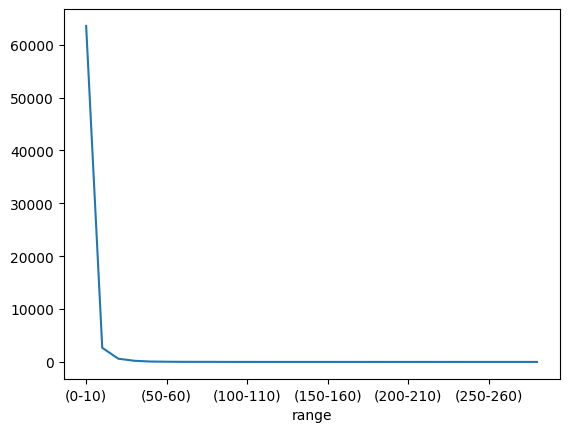

In [15]:
count_dist.plot()

### Head Count distribution 

<AxesSubplot: xlabel='range'>

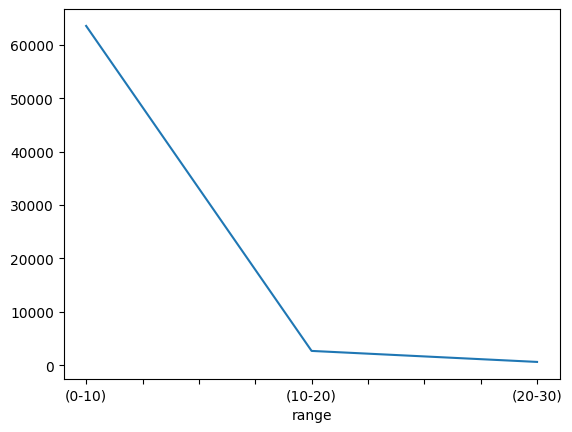

In [16]:
count_dist[:3].plot()

### Tail Count distribution 

<AxesSubplot: xlabel='range'>

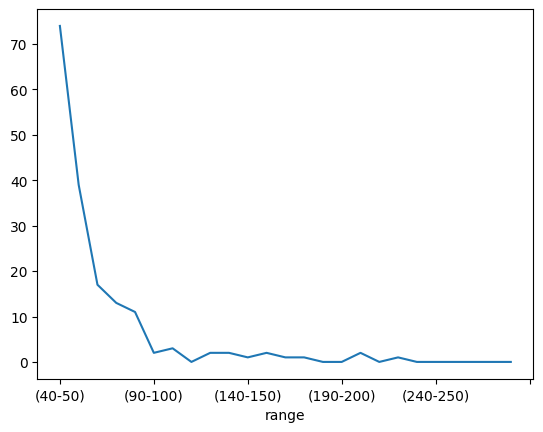

In [17]:
count_dist[4:].plot()